In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

In [4]:
#download data with Keras function ImageDataGenerator
test_dir = 'archive/test'
train_dir = 'archive/train'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Scaling pixels to scale [0, 1]

train_data = datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=64, class_mode='sparse', shuffle=False)  

test_data = datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=64, class_mode='sparse', shuffle=False)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [3]:
x, y = next(train_data)
print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (64, 128, 128, 3)
Shape of y: (64,)


In [4]:
first_image = x[0]
first_label = y[0]
print('Shape of first_image:', first_image.shape)
print('First label:', first_label)

Shape of first_image: (128, 128, 3)
First label: 0.0


In [5]:
test_data

In [6]:
#write function for   fcc nn 
def fcc_nn_model():
    model= keras.Sequential()
    model.add(layers.Flatten (input_shape=[128,128,3]))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [7]:
#and fit model
model=fcc_nn_model()
history_fcc_nn = model.fit(train_data,
          epochs=50,
          validation_data=test_data, batch_size=128)

test_loss, test_accuracy = model.evaluate(test_data)

/Users/alenamartinkova/venvs/neural-networks-me/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-25 15:32:21.794962: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-25 15:32:21.794990: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-25 15:32:21.794998: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-25 15:32:21.795190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-25 15:32:21.795224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow

Epoch 1/50


2024-04-25 15:32:22.385865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/alenamartinkova/venvs/neural-networks-me/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/74 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.4615 - loss: 6.9518

KeyboardInterrupt: 

In [8]:
#visualize fitting of model
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

In [ ]:
check_metrics(history_fcc_nn, 'loss')
check_metrics(history_fcc_nn, 'accuracy')

In [ ]:
#try to add Normalizstion layers
def fcc_nn_model_2():
    model= keras.Sequential()
    model.add(layers.Flatten (input_shape=[128,128,3]))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model_fcc_2=fcc_nn_model_2()
history_fcc_nn_2 = model_fcc_2.fit(train_data,
          epochs=30,
          validation_data=test_data, 
          batch_size=128)

#evaluate model on test data
test_loss_fcc, test_accuracy_fcc = model_fcc_2.evaluate(test_data)

In [ ]:
check_metrics(history_fcc_nn_2, 'loss')
check_metrics(history_fcc_nn_2, 'accuracy')

In [ ]:
#add regularization to model
def fcc_nn_model_3():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=[128,128,3]))
    model.add(layers.Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model_fcc_3=fcc_nn_model_3()
history_fcc_nn_3 = model_fcc_3.fit(train_data,
          epochs=30,
          validation_data=test_data)

test_loss_fcc_3, test_accuracy_fcc_3 = model_fcc_3.evaluate(test_data)
print('Accuracy on test', test_accuracy_fcc_3)

In [ ]:
#add Convolution layers, which are mo suitable for solving such tasks
def conv_nn_model():
    model= keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=[128,128,3]))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model_1=conv_nn_model()
history_1 = model_1.fit(train_data,
          epochs=50,
          validation_data=test_data)

#evaluate model
test_loss_1, test_accuracy_1 = model_1.evaluate(test_data)

In [ ]:
check_metrics(history_1, 'loss')
check_metrics(history_1, 'accuracy')

In [ ]:
def conv_nn_model_2():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=[128,128,3], padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense (32, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model_2=conv_nn_model_2()

history_2 = model_2.fit(train_data,
          epochs=50,
          validation_data=test_data)

test_loss_2, test_accuracy_2 = model_2.evaluate(test_data)
print('Accuracy on test', test_accuracy_2)

In [ ]:
check_metrics(history_2, 'loss')
check_metrics(history_2, 'accuracy')

In [ ]:
#take out regularization on Connolutional layers, as it  had bad impact on results of prevouis model 
def conv_nn_model_3():
    model= keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=[128,128,3]))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Flatten())
    model.add(layers.Dense (32, activation='relu'))
    model.add(layers.Dropout(0.01))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.01))
    model.add(layers.Dense(2, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
    return model

In [ ]:
model_2_2=conv_nn_model_3()

history_2_2 = model_2_2.fit(train_data,
          epochs=60,
          validation_data=test_data)

test_loss_2_2, test_accuracy_2_2 = model_2_2.evaluate(test_data)
print('Accuracy on test', test_accuracy_2_2)

In [ ]:
check_metrics(history_2_2, 'loss')
check_metrics(history_2_2, 'accuracy')

In [2]:
def model_cnn():
    model= keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=[128,128,3]))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.01))
    model.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.01))
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.01))
    model.add(layers.Flatten())
    model.add(layers.Dense (32, activation='relu'))
    model.add(layers.Dropout(0.01))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.01))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [5]:
model_3= model_cnn()

history_3=model_3.fit(x=train_data, validation_data=test_data, epochs=60)

test_loss_3, test_accuracy_3 = model_3.evaluate(test_data)
print('Accuracy on test', test_accuracy_3)

Epoch 1/60


2024-04-25 15:32:56.587166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/alenamartinkova/venvs/neural-networks-me/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.4920 - loss: 0.7972 - val_accuracy: 0.5405 - val_loss: 0.6908
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.4004 - loss: 0.6982 - val_accuracy: 0.5405 - val_loss: 0.6883
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.5895 - loss: 0.6938 - val_accuracy: 0.5405 - val_loss: 0.6891
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.5389 - loss: 0.6901 - val_accuracy: 0.7340 - val_loss: 0.6869
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.6140 - loss: 0.6894 - val_accuracy: 0.5405 - val_loss: 0.6899
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - accuracy: 0.5683 - loss: 0.8456 - val_accuracy: 0.5405 - val_loss: 0.6906
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.5330 - loss: 0.6920 - val_accuracy: 0.5405 - val_loss: 0.6903
Epoch 8/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.6293 - loss: 0.6825 - val_accuracy: 0.540

In [6]:
highest_accuracy_3 = max(history_3.history['accuracy'])
print('Highest train accuracy:', highest_accuracy_3)

test_loss_3, test_accuracy_3 = model_3.evaluate(test_data)
print('Highest test accuracy:', test_accuracy_3)

Highest train accuracy: 0.9961969256401062
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.9029 - loss: 0.4776
Highest test accuracy: 0.8918918967247009


/var/folders/hk/sz2rrrk15v1bmr5bkbf9fl280000gn/T/ipykernel_98616/1258916042.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


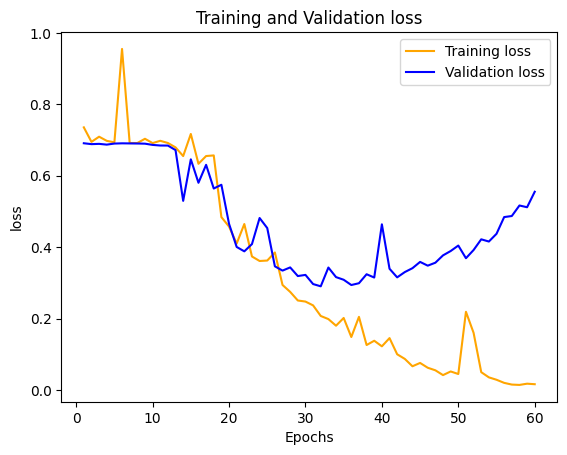

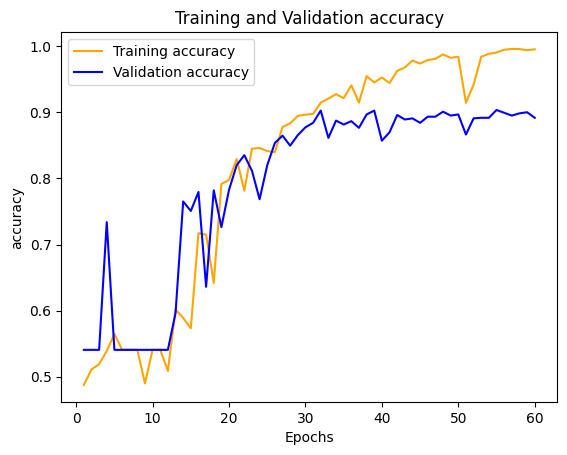

In [9]:
check_metrics(history_3, 'loss')
check_metrics(history_3, 'accuracy')